In [1]:
#Standard Libraries
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Specific Libraries
import sklearn.linear_model as linear_model
import sklearn.preprocessing as preprocessing
from sklearn import tree, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from io import StringIO
from IPython.display import Image

In [2]:
import os

print(os.getcwd())

C:\Users\AmanN\Data Science\Nutrition


# Data Uploading

In [3]:
Nutritional_Facts = pd.read_csv('Nutritional_Facts.csv')
Nutritional_Facts.head()

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
0,NaN,NaN,NaN,(g),(%DV),(g),(%DV),(g),(%DV),(g),...,(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg)Ê,(%DV),(mg)Ê,NaN
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
4,"Carrot, 1 carrot, 7"" long,Ê1 1/4"" diameter (78...",30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."


# Data Cleaning 

In [4]:
Nutritional_Facts = Nutritional_Facts.iloc[1:]
Nutritional_Facts.head()

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
4,"Carrot, 1 carrot, 7"" long,Ê1 1/4"" diameter (78...",30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
5,"Cauliflower, 1/6 medium head (99 g/3.5 oz)",25.0,0.0,0,0,30,1,270,8,5,...,2,0,100,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."


In [5]:
Nutritional_Facts = Nutritional_Facts.dropna(axis=1, how='any')
Nutritional_Facts.head()

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Food Type
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,1,2,10,15,2,2,"Vegetables, Serving Size (gram weight/Êounce w..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,40,2,220,6,6,2,1,4,190,2,4,"Vegetables, Serving Size (gram weight/Êounce w..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0.5,1,80,3,460,13,8,3,4,6,220,6,6,"Vegetables, Serving Size (gram weight/Êounce w..."
4,"Carrot, 1 carrot, 7"" long,Ê1 1/4"" diameter (78...",30.0,0.0,0,0,60,3,250,7,7,2,1,110,10,2,2,"Vegetables, Serving Size (gram weight/Êounce w..."
5,"Cauliflower, 1/6 medium head (99 g/3.5 oz)",25.0,0.0,0,0,30,1,270,8,5,2,2,0,100,2,2,"Vegetables, Serving Size (gram weight/Êounce w..."


In [6]:
Nutritional_Facts['Food and Serving'].nunique()

61

# Exploratory Analysis 

In [7]:
Nutritional_Facts.groupby(by=['Food Type']).sum()

,Calories,CaloriesÊfrom Fat
Food Type,,
Fruits ServingÊSize (gramÊweight/ounceÊweight),1365.0,50.0
"Seafood, Serving Size (84 g/3 oz)",2390.0,500.0
"Vegetables, Serving Size (gram weight/Êounce weight)",670.0,20.0


In [8]:
Nutritional_Facts.groupby(by=['Food Type']).sum().describe()

,Calories,CaloriesÊfrom Fat
count,3.000000,3.000000
mean,1475.000000,190.000000
std,865.260077,268.886593
min,670.000000,20.000000
25%,1017.500000,35.000000
50%,1365.000000,50.000000
75%,1877.500000,275.000000
max,2390.000000,500.000000


In [9]:
Nutritional_Facts.describe(include = ['float', 'int'])

,Calories,CaloriesÊfrom Fat
count,61.000000,61.000000
mean,72.540984,9.344262
std,43.690416,17.523209
min,10.000000,0.000000
25%,25.000000,0.000000
50%,80.000000,0.000000
75%,100.000000,10.000000
max,200.000000,90.000000


In [10]:
Nutritional_Facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 1 to 61
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Food and Serving       61 non-null     object 
 1   Calories               61 non-null     float64
 2   CaloriesÊfrom Fat      61 non-null     float64
 3   Total Fat              61 non-null     object 
 4   Total Fat.1            61 non-null     object 
 5   Sodium                 61 non-null     object 
 6   Sodium.1               61 non-null     object 
 7   Potassium              61 non-null     object 
 8   Potassium.1            61 non-null     object 
 9   Total Carbo-hydrate    61 non-null     object 
 10  Total Carbo-hydrate.1  61 non-null     object 
 11  Protein                61 non-null     object 
 12  Vitamin A              61 non-null     object 
 13  Vitamin C              61 non-null     object 
 14  Calcium                61 non-null     object 
 15  ÊÊIronÊÊ

In [11]:
Nutritional_Facts['Total Fat'] = pd.to_numeric(Nutritional_Facts['Total Fat'], errors='coerce').fillna(0).astype(int)
Nutritional_Facts['Total Fat.1'] = pd.to_numeric(Nutritional_Facts['Total Fat.1'], errors='coerce').fillna(0).astype(int)
Nutritional_Facts['Sodium'] = pd.to_numeric(Nutritional_Facts['Sodium'], errors='coerce').fillna(0).astype(int)
Nutritional_Facts['Potassium'] = pd.to_numeric(Nutritional_Facts['Potassium'], errors='coerce').fillna(0).astype(int)
Nutritional_Facts['Potassium.1'] = pd.to_numeric(Nutritional_Facts['Potassium.1'], errors='coerce').fillna(0).astype(int)
Nutritional_Facts['Total Carbo-hydrate'] = pd.to_numeric(Nutritional_Facts['Total Carbo-hydrate'], errors='coerce').fillna(0).astype(int)
Nutritional_Facts['Total Carbo-hydrate.1'] = pd.to_numeric(Nutritional_Facts['Total Carbo-hydrate.1'], errors='coerce').fillna(0).astype(int)
Nutritional_Facts['Protein'] = pd.to_numeric(Nutritional_Facts['Protein'], errors='coerce').fillna(0).astype(int)
Nutritional_Facts['Vitamin A'] = pd.to_numeric(Nutritional_Facts['Vitamin A'], errors='coerce').fillna(0).astype(int)
Nutritional_Facts['Vitamin C'] = pd.to_numeric(Nutritional_Facts['Vitamin C'], errors='coerce').fillna(0).astype(int)
Nutritional_Facts['Calcium'] = pd.to_numeric(Nutritional_Facts['Calcium'], errors='coerce').fillna(0).astype(int)
Nutritional_Facts['ÊÊIronÊÊ'] = pd.to_numeric(Nutritional_Facts['ÊÊIronÊÊ'], errors='coerce').fillna(0).astype(int)

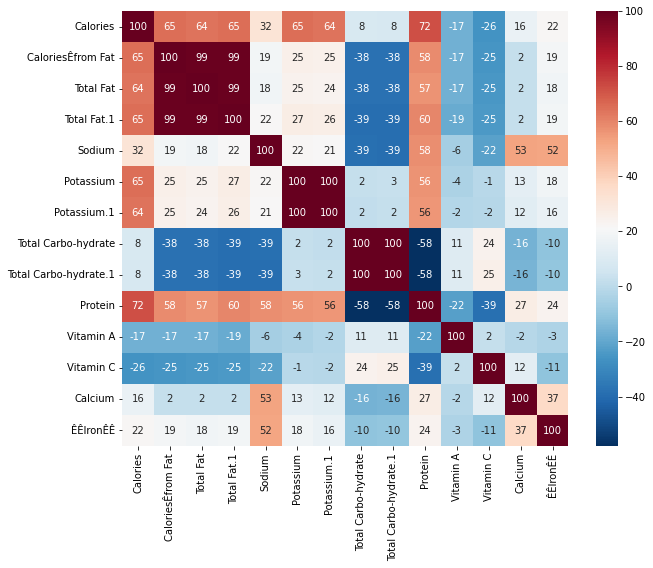

In [12]:
correlations = Nutritional_Facts.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlations * 100, cmap='RdBu_r', annot=True, fmt='.0f')

plt.show()

In [13]:
Nutritional_Facts_Fruits = Nutritional_Facts.loc[Nutritional_Facts['Food Type'] == 'Fruits ServingÊSize (gramÊweight/ounceÊweight)']

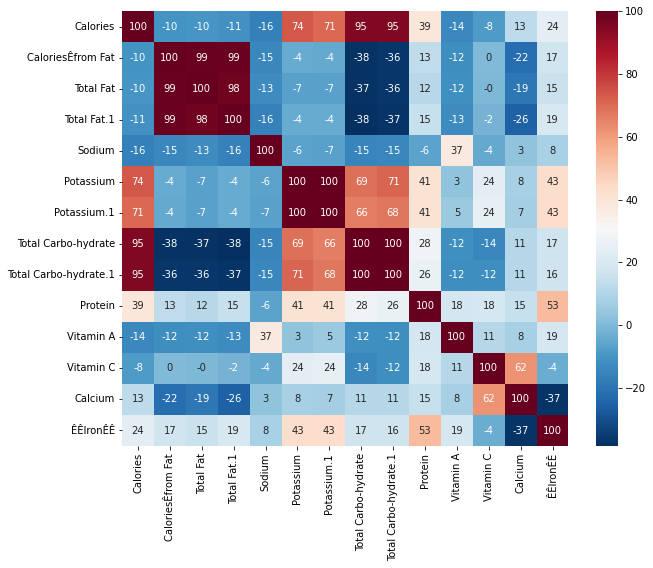

In [14]:
correlations_fruits = Nutritional_Facts_Fruits.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlations_fruits * 100, cmap='RdBu_r', annot=True, fmt='.0f')

plt.show()

In [15]:
Nutritional_Facts_Seafood = Nutritional_Facts[Nutritional_Facts['Food Type'] == 'Seafood, Serving Size (84 g/3 oz)']

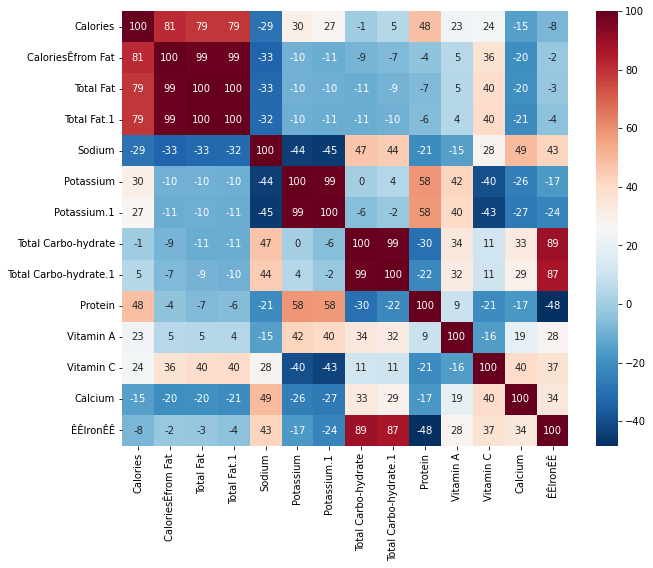

In [16]:
correlations_seafood = Nutritional_Facts_Seafood.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlations_seafood * 100, cmap='RdBu_r', annot=True, fmt='.0f')

plt.show()

In [17]:
Nutritional_Facts_Vegetables = Nutritional_Facts[Nutritional_Facts['Food Type'] == 'Vegetables, Serving Size (gram weight/Êounce weight)']

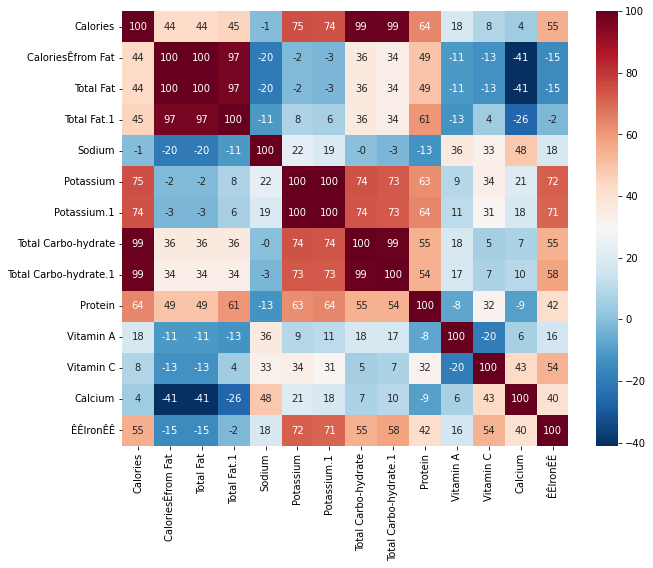

In [18]:
correlations_vegetable = Nutritional_Facts_Vegetables.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlations_vegetable * 100, cmap='RdBu_r', annot=True, fmt='.0f')

plt.show()

In [19]:
Nutritional_Facts_Fruits.describe()

,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,68.250000,2.500000,0.250000,0.550000,3.750000,226.00000,6.500000,16.950000,5.650000,0.850000,11.350000,52.200000,1.900000,1.400000
std,29.167168,8.029551,0.910465,1.605091,8.409737,102.09129,2.982405,8.140057,2.739093,0.366348,27.315457,62.064143,1.651156,1.142481
min,15.000000,0.000000,0.000000,0.000000,0.000000,75.00000,2.000000,3.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000,0.000000,0.000000,160.00000,5.000000,12.000000,4.000000,1.000000,0.000000,13.750000,0.000000,0.000000
50%,60.000000,0.000000,0.000000,0.000000,0.000000,230.00000,7.000000,15.000000,5.000000,1.000000,2.000000,30.000000,2.000000,2.000000
75%,90.000000,0.000000,0.000000,0.000000,0.000000,252.50000,7.000000,21.500000,7.250000,1.000000,6.500000,57.500000,2.000000,2.000000
max,130.000000,35.000000,4.000000,7.000000,30.000000,450.00000,13.000000,34.000000,11.000000,1.000000,120.000000,240.000000,6.000000,4.000000


In [20]:
Nutritional_Facts_Seafood.describe()

,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,113.809524,23.809524,2.571429,4.190476,124.523810,365.238095,10.476190,0.857143,0.285714,20.000000,2.190476,1.523810,3.714286,7.095238
std,26.547352,22.466907,2.521338,3.572381,104.150189,86.001107,2.421137,2.031889,0.717137,3.754997,2.358369,1.887301,3.242574,10.880739
min,80.000000,0.000000,0.000000,1.000000,30.000000,220.000000,6.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,10.000000,1.000000,2.000000,60.000000,300.000000,9.000000,0.000000,0.000000,17.000000,0.000000,0.000000,2.000000,2.000000
50%,110.000000,15.000000,1.000000,2.000000,85.000000,370.000000,11.000000,0.000000,0.000000,20.000000,2.000000,0.000000,2.000000,4.000000
75%,130.000000,35.000000,4.000000,6.000000,110.000000,430.000000,12.000000,0.000000,0.000000,22.000000,4.000000,2.000000,6.000000,6.000000
max,200.000000,90.000000,10.000000,15.000000,330.000000,500.000000,14.000000,6.000000,2.000000,27.000000,10.000000,6.000000,10.000000,45.000000


In [21]:
Nutritional_Facts_Vegetables.describe()

,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,33.500000,1.000000,0.100000,0.250000,28.250000,258.750000,7.400000,7.250000,2.550000,1.500000,21.700000,43.350000,2.500000,2.900000
std,30.482955,4.472136,0.447214,0.910465,32.576832,127.298603,3.733208,6.995299,2.394621,1.192079,42.763856,60.493823,1.432701,1.372665
min,10.000000,0.000000,0.000000,0.000000,0.000000,70.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,190.000000,5.000000,3.000000,1.000000,1.000000,0.000000,10.000000,2.000000,2.000000
50%,22.500000,0.000000,0.000000,0.000000,17.500000,240.000000,7.000000,5.000000,2.000000,1.000000,4.000000,17.500000,2.000000,2.000000
75%,33.750000,0.000000,0.000000,0.000000,43.750000,277.500000,8.250000,7.250000,2.250000,2.000000,10.000000,41.250000,4.000000,4.000000
max,110.000000,20.000000,2.000000,4.000000,115.000000,620.000000,18.000000,26.000000,9.000000,4.000000,130.000000,220.000000,6.000000,6.000000


<AxesSubplot:>

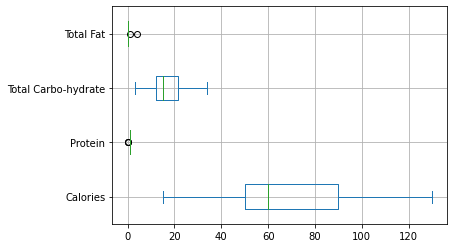

In [22]:
Nutritional_Facts_Fruits[['Calories', 'Protein', 'Total Carbo-hydrate', 'Total Fat']].plot.box(vert = False, grid=True)

In [23]:
Nutritional_Facts_Fruits['Food and Serving'].nunique()

20

Looking through 20 different fruits, fruits on average have 60 calories, less than 20g of carbs, and little to no grams of fats and proteins.

# Identifying Outliers (Fruits)

In [24]:
Nutritional_Facts_Fruits[Nutritional_Facts_Fruits['Total Fat'] > 0]

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Food Type
22,"Avocado, California,1/5 medium (30 g/1.1 oz)",50.0,35.0,4,7,0,0,140,4,3,1,1,0,4,0,2,Fruits ServingÊSize (gramÊweight/ounceÊweight)
28,"Kiwifruit, 2 medium (148 g/5.3 oz)",90.0,10.0,1,2,0,0,450,13,20,7,1,2,240,4,2,Fruits ServingÊSize (gramÊweight/ounceÊweight)


<AxesSubplot:xlabel='Food and Serving'>

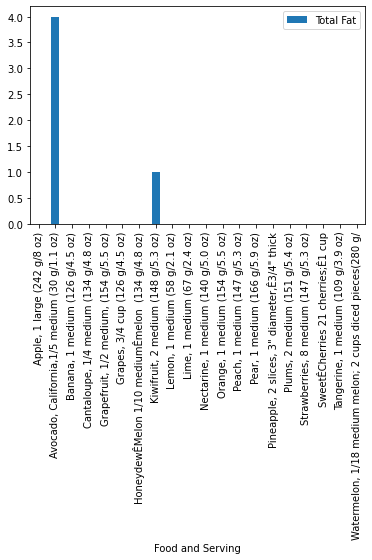

In [25]:
Nutritional_Facts_Fruits.plot.bar(x='Food and Serving', y='Total Fat', rot=90)

<AxesSubplot:>

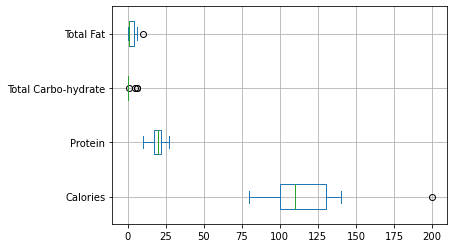

In [26]:
Nutritional_Facts_Seafood[['Calories', 'Protein', 'Total Carbo-hydrate', 'Total Fat']].plot.box(vert = False, grid=True)

In [27]:
Nutritional_Facts_Seafood['Food and Serving'].nunique()

21

Looking through 21 different seafoods, seafoods on average have between 100-125 calories, less than 25g of protein, and little to no grams of fats and carbohydrates. 

# Identifying Outliers (Seafood)

In [28]:
Nutritional_Facts_Seafood[Nutritional_Facts_Seafood['Total Fat'] > 5]

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Food Type
42,Catfish,130.0,60.0,6,9,40,2,230,7,0,0,17,0,0,0,0,"Seafood, Serving Size (84 g/3 oz)"
53,Rainbow Trout,140.0,50.0,6,9,35,1,370,11,0,0,20,4,4,8,2,"Seafood, Serving Size (84 g/3 oz)"
55,"Salmon, Atlantic/Coho/Sockeye /Chinook",200.0,90.0,10,15,55,2,430,12,0,0,24,4,4,2,2,"Seafood, Serving Size (84 g/3 oz)"
59,Swordfish,120.0,50.0,6,9,100,4,310,9,0,0,16,2,2,0,6,"Seafood, Serving Size (84 g/3 oz)"


<AxesSubplot:xlabel='Food and Serving'>

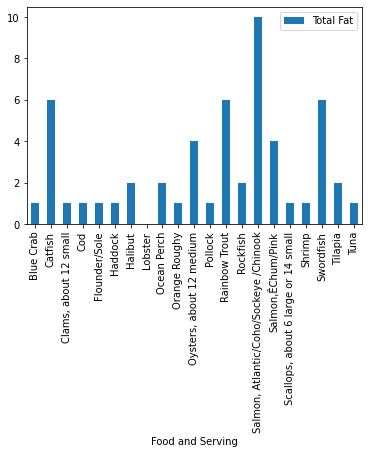

In [29]:
Nutritional_Facts_Seafood.plot.bar(x='Food and Serving', y='Total Fat', rot=90)

In [30]:
Nutritional_Facts_Seafood[Nutritional_Facts_Seafood['Total Carbo-hydrate'] > 0]

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Food Type
43,"Clams, about 12 small",110.0,15.0,1,2,95,4,470,13,6,2,17,10,0,8,30,"Seafood, Serving Size (84 g/3 oz)"
48,Lobster,80.0,0.0,0,1,320,13,300,9,1,0,17,2,0,6,2,"Seafood, Serving Size (84 g/3 oz)"
51,"Oysters, about 12 medium",100.0,35.0,4,6,300,13,220,6,6,2,10,0,6,6,45,"Seafood, Serving Size (84 g/3 oz)"
57,"Scallops, about 6 large or 14 small",140.0,10.0,1,2,310,13,430,12,5,2,27,2,0,4,14,"Seafood, Serving Size (84 g/3 oz)"


<AxesSubplot:xlabel='Food and Serving'>

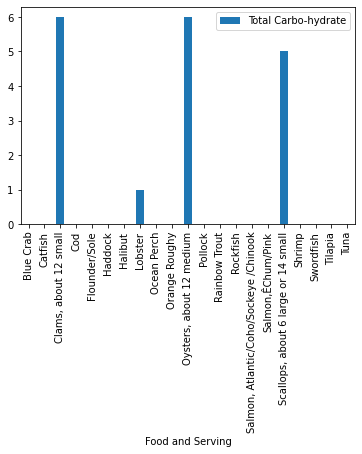

In [31]:
Nutritional_Facts_Seafood.plot.bar(x='Food and Serving', y='Total Carbo-hydrate', rot=90)

In [32]:
Nutritional_Facts_Seafood[Nutritional_Facts_Seafood['Calories'] > 110]

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Food Type
42,Catfish,130.0,60.0,6,9,40,2,230,7,0,0,17,0,0,0,0,"Seafood, Serving Size (84 g/3 oz)"
47,Halibut,120.0,15.0,2,3,60,3,500,14,0,0,23,4,0,2,6,"Seafood, Serving Size (84 g/3 oz)"
53,Rainbow Trout,140.0,50.0,6,9,35,1,370,11,0,0,20,4,4,8,2,"Seafood, Serving Size (84 g/3 oz)"
55,"Salmon, Atlantic/Coho/Sockeye /Chinook",200.0,90.0,10,15,55,2,430,12,0,0,24,4,4,2,2,"Seafood, Serving Size (84 g/3 oz)"
56,"Salmon,ÊChum/Pink",130.0,40.0,4,6,65,3,420,12,0,0,22,2,0,2,4,"Seafood, Serving Size (84 g/3 oz)"
57,"Scallops, about 6 large or 14 small",140.0,10.0,1,2,310,13,430,12,5,2,27,2,0,4,14,"Seafood, Serving Size (84 g/3 oz)"
59,Swordfish,120.0,50.0,6,9,100,4,310,9,0,0,16,2,2,0,6,"Seafood, Serving Size (84 g/3 oz)"
61,Tuna,130.0,15.0,1,2,40,2,480,14,0,0,26,2,2,2,4,"Seafood, Serving Size (84 g/3 oz)"


<AxesSubplot:xlabel='Food and Serving'>

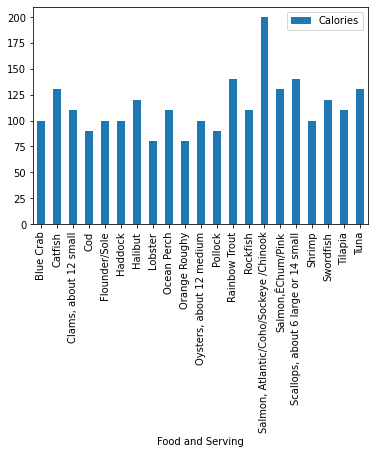

In [33]:
Nutritional_Facts_Seafood.plot.bar(x='Food and Serving', y='Calories', rot=90)

<AxesSubplot:>

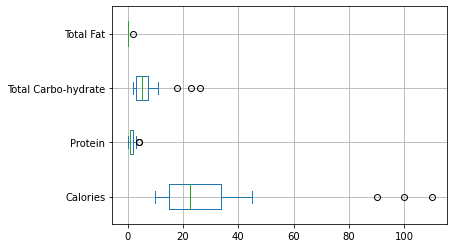

In [34]:
Nutritional_Facts_Vegetables[['Calories', 'Protein', 'Total Carbo-hydrate', 'Total Fat']].plot.box(vert = False, grid=True)

In [35]:
Nutritional_Facts_Vegetables['Food and Serving'].nunique()

20

Looking through 20 different vegetables, vegetables on average have little more than 20 calories, little to no grams of proteins and fats, and less than 10 grams of carbs based on the graph visualization.

# Identifying Outliers Vegetables 

In [36]:
Nutritional_Facts_Vegetables[Nutritional_Facts_Vegetables['Total Fat'] > 0]

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Food Type
18,"Sweet Corn, kernels from 1Êmedium ear (90 g/3....",90.0,20.0,2,4,0,0,250,7,18,6,4,2,10,0,2,"Vegetables, Serving Size (gram weight/Êounce w..."


<AxesSubplot:xlabel='Food and Serving'>

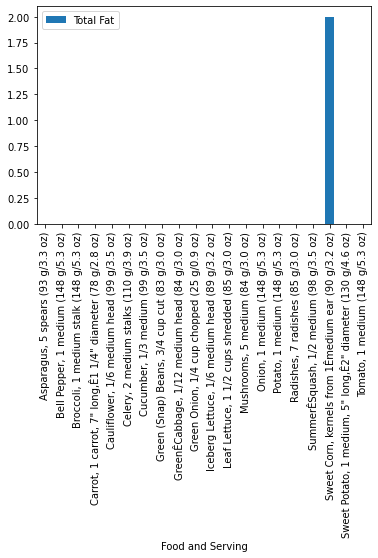

In [37]:
Nutritional_Facts_Vegetables.plot.bar(x='Food and Serving', y='Total Fat', rot=90)

In [38]:
Nutritional_Facts_Vegetables[Nutritional_Facts_Vegetables['Total Carbo-hydrate'] >= 10]

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Food Type
14,"Onion, 1 medium (148 g/5.3 oz)",45.0,0.0,0,0,5,0,190,5,11,4,1,0,20,4,4,"Vegetables, Serving Size (gram weight/Êounce w..."
15,"Potato, 1 medium (148 g/5.3 oz)",110.0,0.0,0,0,0,0,620,18,26,9,3,0,45,2,6,"Vegetables, Serving Size (gram weight/Êounce w..."
18,"Sweet Corn, kernels from 1Êmedium ear (90 g/3....",90.0,20.0,2,4,0,0,250,7,18,6,4,2,10,0,2,"Vegetables, Serving Size (gram weight/Êounce w..."
19,"Sweet Potato, 1 medium, 5"" long,Ê2"" diameter (...",100.0,0.0,0,0,70,3,440,13,23,8,2,120,30,4,4,"Vegetables, Serving Size (gram weight/Êounce w..."


In [ ]:
Nutritional_Facts_Vegetables[Nutritional_Facts_Vegetables['Total Carbo-hydrate'] >= 10]

<AxesSubplot:xlabel='Food and Serving'>

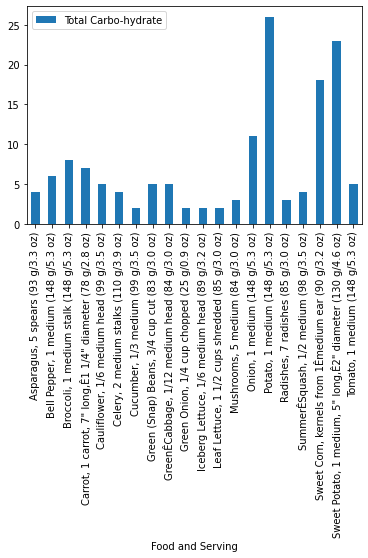

In [39]:
Nutritional_Facts_Vegetables.plot.bar(x='Food and Serving', y='Total Carbo-hydrate', rot=90)

In [40]:
Nutritional_Facts_Vegetables[Nutritional_Facts_Vegetables['Protein'] > 1]

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Food Type
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,1,2,10,15,2,2,"Vegetables, Serving Size (gram weight/Êounce w..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0,1,80,3,460,13,8,3,4,6,220,6,6,"Vegetables, Serving Size (gram weight/Êounce w..."
5,"Cauliflower, 1/6 medium head (99 g/3.5 oz)",25.0,0.0,0,0,30,1,270,8,5,2,2,0,100,2,2,"Vegetables, Serving Size (gram weight/Êounce w..."
13,"Mushrooms, 5 medium (84 g/3.0 oz)",20.0,0.0,0,0,15,0,300,9,3,1,3,0,2,0,2,"Vegetables, Serving Size (gram weight/Êounce w..."
15,"Potato, 1 medium (148 g/5.3 oz)",110.0,0.0,0,0,0,0,620,18,26,9,3,0,45,2,6,"Vegetables, Serving Size (gram weight/Êounce w..."
18,"Sweet Corn, kernels from 1Êmedium ear (90 g/3....",90.0,20.0,2,4,0,0,250,7,18,6,4,2,10,0,2,"Vegetables, Serving Size (gram weight/Êounce w..."
19,"Sweet Potato, 1 medium, 5"" long,Ê2"" diameter (...",100.0,0.0,0,0,70,3,440,13,23,8,2,120,30,4,4,"Vegetables, Serving Size (gram weight/Êounce w..."


<AxesSubplot:xlabel='Food and Serving'>

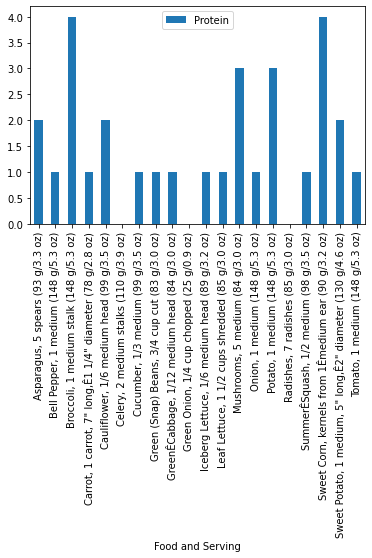

In [41]:
Nutritional_Facts_Vegetables.plot.bar(x='Food and Serving', y='Protein', rot=90)

In [42]:
Nutritional_Facts_Vegetables[Nutritional_Facts_Vegetables['Calories'] > 25]

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Food Type
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0,1,80,3,460,13,8,3,4,6,220,6,6,"Vegetables, Serving Size (gram weight/Êounce w..."
4,"Carrot, 1 carrot, 7"" long,Ê1 1/4"" diameter (78...",30.0,0.0,0,0,60,3,250,7,7,2,1,110,10,2,2,"Vegetables, Serving Size (gram weight/Êounce w..."
14,"Onion, 1 medium (148 g/5.3 oz)",45.0,0.0,0,0,5,0,190,5,11,4,1,0,20,4,4,"Vegetables, Serving Size (gram weight/Êounce w..."
15,"Potato, 1 medium (148 g/5.3 oz)",110.0,0.0,0,0,0,0,620,18,26,9,3,0,45,2,6,"Vegetables, Serving Size (gram weight/Êounce w..."
18,"Sweet Corn, kernels from 1Êmedium ear (90 g/3....",90.0,20.0,2,4,0,0,250,7,18,6,4,2,10,0,2,"Vegetables, Serving Size (gram weight/Êounce w..."
19,"Sweet Potato, 1 medium, 5"" long,Ê2"" diameter (...",100.0,0.0,0,0,70,3,440,13,23,8,2,120,30,4,4,"Vegetables, Serving Size (gram weight/Êounce w..."


<AxesSubplot:xlabel='Food and Serving'>

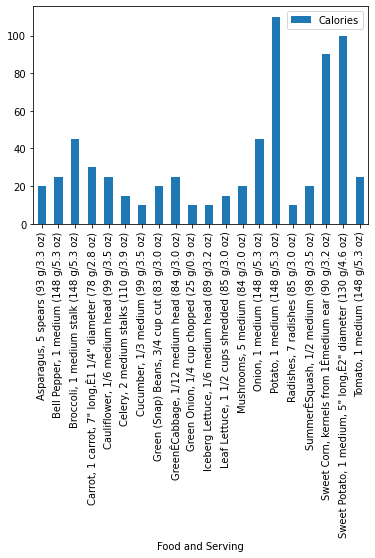

In [43]:
Nutritional_Facts_Vegetables.plot.bar(x='Food and Serving', y='Calories', rot=90)

In [45]:
Nutritional_Facts_Vegetables[Nutritional_Facts_Vegetables['Potassium'] > 300]

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Food Type
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0,1,80,3,460,13,8,3,4,6,220,6,6,"Vegetables, Serving Size (gram weight/Êounce w..."
15,"Potato, 1 medium (148 g/5.3 oz)",110.0,0.0,0,0,0,0,620,18,26,9,3,0,45,2,6,"Vegetables, Serving Size (gram weight/Êounce w..."
19,"Sweet Potato, 1 medium, 5"" long,Ê2"" diameter (...",100.0,0.0,0,0,70,3,440,13,23,8,2,120,30,4,4,"Vegetables, Serving Size (gram weight/Êounce w..."
20,"Tomato, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,20,1,340,10,5,2,1,20,40,2,4,"Vegetables, Serving Size (gram weight/Êounce w..."


In [48]:
Nutritional_Facts_Fruits[Nutritional_Facts_Fruits['Potassium'] > 250]

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Food Type
21,"Apple, 1 large (242 g/8 oz)",130.0,0.0,0,0,0,0,260,7,34,11,1,2,8,2,2,Fruits ServingÊSize (gramÊweight/ounceÊweight)
23,"Banana, 1 medium (126 g/4.5 oz)",110.0,0.0,0,0,0,0,450,13,30,10,1,2,15,0,2,Fruits ServingÊSize (gramÊweight/ounceÊweight)
28,"Kiwifruit, 2 medium (148 g/5.3 oz)",90.0,10.0,1,2,0,0,450,13,20,7,1,2,240,4,2,Fruits ServingÊSize (gramÊweight/ounceÊweight)
38,SweetÊCherries 21 cherries;Ê1 cup,100.0,0.0,0,0,0,0,350,10,26,9,1,2,15,2,2,Fruits ServingÊSize (gramÊweight/ounceÊweight)
40,"Watermelon, 1/18 medium melon; 2 cups diced pi...",80.0,0.0,0,0,0,0,270,8,21,7,1,30,25,2,4,Fruits ServingÊSize (gramÊweight/ounceÊweight)


In [54]:
Nutritional_Facts_Seafood[Nutritional_Facts_Seafood['Potassium'] > 430]

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Food Type
43,"Clams, about 12 small",110.0,15.0,1,2,95,4,470,13,6,2,17,10,0,8,30,"Seafood, Serving Size (84 g/3 oz)"
44,Cod,90.0,5.0,1,2,65,3,460,13,0,0,20,0,2,2,2,"Seafood, Serving Size (84 g/3 oz)"
47,Halibut,120.0,15.0,2,3,60,3,500,14,0,0,23,4,0,2,6,"Seafood, Serving Size (84 g/3 oz)"
54,Rockfish,110.0,15.0,2,3,70,3,440,13,0,0,21,4,0,2,2,"Seafood, Serving Size (84 g/3 oz)"
61,Tuna,130.0,15.0,1,2,40,2,480,14,0,0,26,2,2,2,4,"Seafood, Serving Size (84 g/3 oz)"
